The Nernst equation, a fundamental principle in electrochemistry, governs the cell potential in both lithium-ion batteries and newer, safer chemistries like flow batteries or solid-state batteries. However, the practical voltage range of these batteries is determined by their respective materials and design, not just the underlying electrochemical principles.

Safer battery chemistries, like flow batteries or solid-state batteries, can often operate over a wider voltage range due to improved stability and safety. This wider voltage range allows for better utilization of the battery's capacity and can lead to higher energy density and efficiency.

However, to handle this wider voltage range, more flexible and efficient DC-DC converters will be required. These devices adjust the DC voltage from the battery to the level required by the load, ensuring consistent performance regardless of the state of charge or voltage of the battery.

In conclusion, advancements in safer battery chemistries that offer wider voltage ranges, coupled with improvements in DC-DC conversion technology, hold promise for the development of better, more efficient batteries in the future.

1.423956538078376 1.125


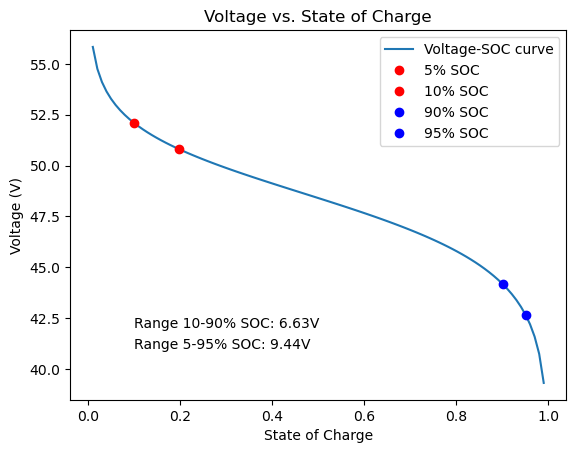

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Gas constant in J/(mol K)
T = 298.15  # Temperature in K
F = 96485  # Faraday's constant in C/mol

# Iron-chloride RFB parameters
E0_Fe_lhs = -0.44  # Standard cell potential in V for the lhs reaction
E0_Fe_rhs = 0.77  # Standard cell potential in V for the rhs reaction

# Initial concentrations
initial_fecl2 = 2  # Initial concentration of FeCl2 in M
initial_fecl3 = 0  # Initial concentration of FeCl3 in M

# Array of SOC values from 0.01 to 0.99
SOC = np.linspace(0.01, 0.99, 100)

# Calculate the concentrations at different SOC values
fecl2_concentration = initial_fecl2 * (1 - SOC)
fecl3_concentration = initial_fecl2 * SOC

# Calculate the voltages at different SOC values
V_Fe_lhs = E0_Fe_lhs - R * T / (2 * F) * np.log(fecl2_concentration**2 / fecl3_concentration)
V_Fe_rhs = E0_Fe_rhs - R * T / F * np.log(fecl3_concentration / fecl2_concentration)

# The cell voltage is the difference between the rhs and lhs voltages
V_Fe = (V_Fe_rhs - V_Fe_lhs) * 48/1.2

# Plot voltage versus SOC
plt.figure()
plt.plot(SOC, V_Fe)
plt.xlabel('State of Charge')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. State of Charge')

# Mark the voltages for 10% and 90% SOC
idx_5 = np.argmin(np.abs(SOC - 0.10))
idx_10 = np.argmin(np.abs(SOC - 0.20))
idx_90 = np.argmin(np.abs(SOC - 0.90))
idx_95 = np.argmin(np.abs(SOC - 0.95))
plt.plot(SOC[idx_5], V_Fe[idx_5], 'ro')  # Mark the 5% SOC with a red dot
plt.plot(SOC[idx_10], V_Fe[idx_10], 'ro')  # Mark the 10% SOC with a red dot
plt.plot(SOC[idx_90], V_Fe[idx_90], 'bo')  # Mark the 90% SOC with a blue dot
plt.plot(SOC[idx_95], V_Fe[idx_95], 'bo')  # Mark the 95% SOC with a blue dot
plt.legend(['Voltage-SOC curve', '5% SOC', '10% SOC', '90% SOC', '95% SOC'])

range_5_95 = V_Fe[idx_5] - V_Fe[idx_95]
range_10_90 = V_Fe[idx_10] - V_Fe[idx_90]

plt.text(0.1, 41, f'Range 5-95% SOC: {range_5_95:.2f}V')
plt.text(0.1, 42, f'Range 10-90% SOC: {range_10_90:.2f}V')

print(range_5_95/range_10_90, ((95-5)/(90-10)))
plt.show()
